In [2]:
%matplotlib inline
from simulation import *
#from scipy.special import comb
import numpy as np

In [3]:
def findSet2(myG,myCenterNode,myMaxDeg):
    curSet = set()
    curDeg = myMaxDeg
    while(curDeg>0):
        tempoSet = set(findNeighDegN(myG,myCenterNode,curDeg))
        curSet = curSet.union(tempoSet)
        curDeg -= 1
    return curSet

Generating mGraph
----- DONE
Getting layout


----- DONE
Setting default attributes
----- DONE
Choosing the source
----- DONE
Choosing the monitoring nodes
----- DONE
Mlist :  [281, 317, 444, 416, 242, 441, 401, 294, 160, 182, 229, 479, 400, 372, 312, 263, 73, 197, 111, 349, 474, 396, 14, 288, 153] 
Slist :  [328]


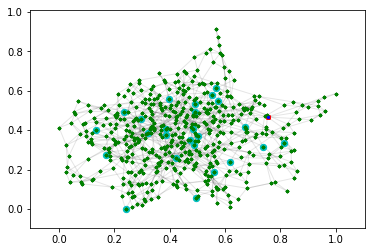

Starting infection


DONE


In [4]:
figureList = list()
# Parameters definition
numRumors = 10
maxThreshold = 1
numMonitors = 25
propagProba = 0.2
numNodes = 500
linkProba = 0.2
monitorTrigger = list()
numStep = 100


j=0

Graph, Pos, rumorSources, monitorsList = generateGraphReady(numNodes,linkProba,maxThreshold,numRumors,numMonitors)

fig1 =  drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)
#fig1.savefig('./TestFigs/figT'+str(j)+'.png')

print("Starting infection")
infections = [[] for n in range(numRumors)]

infected = getInfectedList(Graph,numRumors)

while(not isAllInfected(Graph,numRumors)):

    Graph = infectionForward(Graph, propagProba, numRumors)
    infected = getInfectedList(Graph,numRumors)

    # j+1 because j=0 is step 1
    monitorTrigger = updateMonitorTrig(j+1,monitorTrigger,monitorsList,Graph,numRumors)
    j += 1
    #fig2 = drawColoredGraph(Graph, Pos, numRumors, rumorSources, myMonitors=monitorsList,myIndex=j)
    
print("DONE")

In [5]:
sets = list()
monitorTrigger2 = sorted(monitorTrigger, key=lambda x : (x[0], x[2]))
for i in range(int(len(monitorTrigger2)/numRumors)):
    set1 =findSet(Graph,monitorTrigger2[i*numRumors][0],monitorTrigger2[i*numRumors][2])
    sets.append(set(set1))
    
source = set.intersection(*sets)

try:
    print("Identified Source = ",list(source)[0],"\nReal Source = ",rumorSources[0])
except:
    print("Real Source = ",rumorSources[0])
    print("No sources identified")
    #printMonitorTrig(monitorTrigger)
    #print('\n\nDifferent sets')
    #print(*sets,sep='\n')

Real Source =  328
No sources identified


In [6]:
from networkUtils import drawColoredGraph2

setList = []


for i in monitorTrigger:
    nodeSet = findSet2(Graph,i[0],i[2])
    setList.append(nodeSet)
    
finalSet = set.intersection(*setList)
print("Real Source = ",rumorSources[0])
print("Detected Source = ",list(finalSet))
finalList = list(finalSet)


drawColoredGraph2(Graph,Pos,numRumors,rumorSources,monitorsList,finalList)
#fig.savefig('./TestFigs/figEND'+'png')

Real Source =  328
Detected Source =  [10, 17, 18, 19, 20, 21, 22, 23, 26, 27, 29, 30, 32, 33, 35, 36, 37, 38, 40, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 112, 138, 139, 163, 165, 166, 167, 168, 169, 170, 171, 172, 174, 180, 181, 183, 184, 185, 208, 212, 213, 234, 235, 239, 240, 241, 243, 244, 245, 247, 257, 283, 292, 306, 308, 309, 310, 311, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 342, 348, 370, 371, 374, 387, 388, 389, 390, 393, 402, 403, 404, 405, 421, 443, 459, 467, 468, 469, 470, 471, 472, 473, 475, 484, 490, 491, 492, 493, 494, 495, 496]


In [21]:
degCent = nx.degree_centrality(Graph)

maxDeg = -1
maxNode = -1

for node in finalList :
    if degCent[node] > maxDeg :
        maxDeg = degCent[node]
        maxNode = node
    #print(node,' : ',degCent[node])

print('\n Max degree Centrality : \n node ',maxNode,' : ', maxDeg)


 Max degree Centrality : 
 node  106  :  0.012024048096192383


In [22]:
print('Monitors : ',monitorsList,'\n\n')

pathList = list()

for source in finalList :
    print('\n source : ',source,': \n')
    for target in monitorsList :
        print(target,' : ',len(nx.shortest_path(Graph,source,target))-1)

Monitors :  [408, 11, 67, 440, 450, 43, 24, 384, 348, 56, 407, 229, 155, 23, 464, 371, 76, 332, 371, 420, 182, 206, 489, 347, 149] 



 source :  12 : 

408  :  4
11  :  2
67  :  7
440  :  6
450  :  5
43  :  8
24  :  7
384  :  6
348  :  4
56  :  1
407  :  5
229  :  4
155  :  6
23  :  7
464  :  6
371  :  6
76  :  7
332  :  6
371  :  6
420  :  5
182  :  6
206  :  6
489  :  7
347  :  4
149  :  6

 source :  36 : 

408  :  4
11  :  6
67  :  6
440  :  5
450  :  7
43  :  6
24  :  4
384  :  3
348  :  6
56  :  6
407  :  3
229  :  5
155  :  3
23  :  4
464  :  7
371  :  5
76  :  6
332  :  3
371  :  5
420  :  1
182  :  5
206  :  7
489  :  5
347  :  6
149  :  6

 source :  103 : 

408  :  6
11  :  6
67  :  8
440  :  3
450  :  4
43  :  7
24  :  6
384  :  5
348  :  6
56  :  6
407  :  6
229  :  5
155  :  5
23  :  7
464  :  5
371  :  6
76  :  7
332  :  6
371  :  6
420  :  5
182  :  4
206  :  5
489  :  7
347  :  4
149  :  6

 source :  106 : 

408  :  5
11  :  5
67  :  6
440  :  5
450  :  2
43  :  5
24

  :  7
229  :  3
155  :  6
23  :  8
464  :  7
371  :  6
76  :  7
332  :  4
371  :  6
420  :  6
182  :  5
206  :  7
489  :  7
347  :  7
149  :  7

 source :  220 : 

408  :  6
11  :  5
67  :  9
440  :  7
450  :  5
43  :  8
24  :  7
384  :  8
348  :  7
56  :  7
407  :  7
229  :  4
155  :  7
23  :  8
464  :  8
371  :  6
76  :  7
332  :  3
371  :  6
420  :  7
182  :  6
206  :  8
489  :  8
347  :  7
149  :  8

 source :  222 : 

408  :  5
11  :  6
67  :  10
440  :  8
450  :  4
43  :  9
24  :  8
384  :  8
348  :  8
56  :  6
407  :  6
229  :  4
155  :  8
23  :  9
464  :  9
371  :  7
76  :  7
332  :  3
371  :  7
420  :  7
182  :  7
206  :  7
489  :  9
347  :  6
149  :  8

 source :  223 : 

408  :  4
11  :  7
67  :  9
440  :  7
450  :  3
43  :  9
24  :  7
384  :  7
348  :  7
56  :  5
407  :  5
229  :  3
155  :  8
23  :  8
464  :  9
371  :  7
76  :  7
332  :  4
371  :  7
420  :  7
182  :  6
206  :  6
489  :  8
347  :  5
149  :  7

 source :  224 : 

408  :  4
11  :  7
67  :  10
440  :  7
450  :

 :  5
155  :  5
23  :  6
464  :  8
371  :  5
76  :  4
332  :  2
371  :  5
420  :  3
182  :  5
206  :  8
489  :  7
347  :  6
149  :  7

 source :  326 : 

408  :  3
11  :  4
67  :  8
440  :  6
450  :  4
43  :  7
24  :  6
384  :  5
348  :  5
56  :  2
407  :  4
229  :  5
155  :  4
23  :  7
464  :  6
371  :  3
76  :  7
332  :  3
371  :  3
420  :  7
182  :  7
206  :  7
489  :  7
347  :  5
149  :  6

 source :  372 : 

408  :  3
11  :  5
67  :  7
440  :  7
450  :  6
43  :  5
24  :  6
384  :  4
348  :  6
56  :  4
407  :  4
229  :  4
155  :  3
23  :  7
464  :  8
371  :  1
76  :  6
332  :  5
371  :  1
420  :  6
182  :  7
206  :  7
489  :  7
347  :  7
149  :  6

 source :  373 : 

408  :  3
11  :  5
67  :  7
440  :  7
450  :  5
43  :  6
24  :  7
384  :  4
348  :  6
56  :  3
407  :  4
229  :  4
155  :  3
23  :  7
464  :  7
371  :  2
76  :  6
332  :  4
371  :  2
420  :  6
182  :  8
206  :  7
489  :  7
347  :  6
149  :  6

 source :  374 : 

408  :  2
11  :  6
67  :  6
440  :  6
450  :  5
43  :  6


In [8]:
for i in range(int(len(monitorTrigger2)/numRumors)):
    print('Monitor node : ', monitorTrigger2[i*numRumors][0],' path : ',monitorTrigger2[i*numRumors][2])

Monitor node :  27  path :  4
Monitor node :  32  path :  5
Monitor node :  44  path :  9
Monitor node :  73  path :  10
Monitor node :  147  path :  9
Monitor node :  153  path :  7
Monitor node :  197  path :  8
Monitor node :  238  path :  9
Monitor node :  239  path :  9
Monitor node :  242  path :  8
Monitor node :  253  path :  10
Monitor node :  259  path :  10
Monitor node :  293  path :  9
Monitor node :  300  path :  8
Monitor node :  305  path :  8
Monitor node :  318  path :  7
Monitor node :  336  path :  9
Monitor node :  346  path :  9
Monitor node :  389  path :  5
Monitor node :  398  path :  7
Monitor node :  410  path :  9
Monitor node :  436  path :  7
Monitor node :  450  path :  8
Monitor node :  493  path :  9


In [9]:
#Work on the markov chain like propag
A = nx.adjacency_matrix(Graph).todense()

#refactor A w/ the correct probability

A = A*propagProba/4
I = np.identity(A.shape[0])*(1-propagProba)
A = A+I

In [10]:
print(monitorTrigger2)

[(27, 1, 4), (32, 1, 5), (44, 1, 9), (73, 1, 10), (147, 1, 9), (153, 1, 7), (197, 1, 8), (238, 1, 9), (239, 1, 9), (242, 1, 8), (253, 1, 10), (259, 1, 10), (293, 1, 9), (300, 1, 8), (305, 1, 8), (318, 1, 7), (336, 1, 9), (346, 1, 9), (389, 1, 5), (398, 1, 7), (410, 1, 9), (436, 1, 7), (450, 1, 8), (493, 1, 9)]


In [23]:
def propaProd(myPropagP,myDist,myStep):
    if myDist > myStep :
        return 0
    
    proba = 1-myPropagP
    Res = 1
    exponent = myStep
    for i in range(myStep-myDist+1,myStep+1):
        Res *= (1 - pow(proba,exponent))
        #print("1 - ",proba,"^",exponent)
        exponent -= 1
    return Res

In [24]:
sourceDict ={}

for source in finalList:
    sourceDict[source] = 0


for mInfo in monitorTrigger2:
    print("Monitor ",mInfo[0]," :")
    for source in finalList:
        prb = propaProd(propagProba,len(nx.shortest_path(Graph,source,mInfo[0]))-1,mInfo[2])
        sourceDict[source]+=prb
        print("Infected by node ",source," with proba : ",prb)

Monitor  11  :
Infected by node  12  with proba :  0.9223825878492347
Infected by node  36  with proba :  0.6623661201467853
Infected by node  103  with proba :  0.6623661201467853
Infected by node  106  with proba :  0.7420423060669329
Infected by node  122  with proba :  0.8716740688193171
Infected by node  124  with proba :  0.8117730829257136
Infected by node  126  with proba :  0.7420423060669329
Infected by node  127  with proba :  0.6623661201467853
Infected by node  129  with proba :  0.7420423060669329
Infected by node  137  with proba :  0.6623661201467853
Infected by node  153  with proba :  0.6623661201467853
Infected by node  154  with proba :  0.5734648443965087
Infected by node  156  with proba :  0.5734648443965087
Infected by node  157  with proba :  0.5734648443965087
Infected by node  179  with proba :  0.7420423060669329
Infected by node  189  with proba :  0.8716740688193171
Infected by node  198  with proba :  0.7420423060669329
Infected by node  199  with proba :

0.848049030332549
Infected by node  217  with proba :  0.8870624494415257
Infected by node  218  with proba :  0.9194113608648956
Infected by node  219  with proba :  0.8870624494415257
Infected by node  220  with proba :  0.8870624494415257
Infected by node  222  with proba :  0.848049030332549
Infected by node  223  with proba :  0.801427041843809
Infected by node  224  with proba :  0.801427041843809
Infected by node  225  with proba :  0.848049030332549
Infected by node  227  with proba :  0.801427041843809
Infected by node  232  with proba :  0.848049030332549
Infected by node  233  with proba :  0.801427041843809
Infected by node  234  with proba :  0.801427041843809
Infected by node  235  with proba :  0.801427041843809
Infected by node  253  with proba :  0.801427041843809
Infected by node  256  with proba :  0.7463533948862221
Infected by node  257  with proba :  0.801427041843809
Infected by node  258  with proba :  0.801427041843809
Infected by node  260  with proba :  0.848

Infected by node  265  with proba :  0.55732324402442
Infected by node  266  with proba :  0.55732324402442
Infected by node  267  with proba :  0.6437221713225609
Infected by node  268  with proba :  0.55732324402442
Infected by node  294  with proba :  0.847138624997297
Infected by node  301  with proba :  0.55732324402442
Infected by node  302  with proba :  0.55732324402442
Infected by node  303  with proba :  0.55732324402442
Infected by node  304  with proba :  0.6437221713225609
Infected by node  305  with proba :  0.6437221713225609
Infected by node  306  with proba :  0.7211556719850817
Infected by node  307  with proba :  0.7211556719850817
Infected by node  308  with proba :  0.7889237019646282
Infected by node  309  with proba :  0.7211556719850817
Infected by node  326  with proba :  0.6437221713225609
Infected by node  372  with proba :  0.6437221713225609
Infected by node  373  with proba :  0.6437221713225609
Infected by node  374  with proba :  0.7211556719850817
Infec

 304  with proba :  0.9552956958732861
Infected by node  305  with proba :  0.9552956958732861
Infected by node  306  with proba :  0.9664379670237887
Infected by node  307  with proba :  0.9664379670237887
Infected by node  308  with proba :  0.9754347647568228
Infected by node  309  with proba :  0.9664379670237887
Infected by node  326  with proba :  0.9552956958732861
Infected by node  372  with proba :  0.9552956958732861
Infected by node  373  with proba :  0.9552956958732861
Infected by node  374  with proba :  0.9664379670237887
Infected by node  404  with proba :  0.9415284339854026
Infected by node  405  with proba :  0.9552956958732861
Infected by node  406  with proba :  0.9415284339854026
Infected by node  410  with proba :  0.9552956958732861
Infected by node  418  with proba :  0.982685705442096
Infected by node  419  with proba :  0.982685705442096
Infected by node  421  with proba :  0.982685705442096
Infected by node  422  with proba :  0.9932112102462094
Infected by 

 with proba :  0.9663889686649837
Infected by node  421  with proba :  0.9663889686649837
Infected by node  422  with proba :  0.986761900409895
Infected by node  423  with proba :  0.9776606282906207
Infected by node  433  with proba :  0.9142426393674807
Infected by node  434  with proba :  0.9353038087912328
Infected by node  435  with proba :  0.9353038087912328
Infected by node  436  with proba :  0.952461835867625
Infected by node  437  with proba :  0.9353038087912328
Infected by node  452  with proba :  0.9142426393674807
Infected by node  476  with proba :  0.9353038087912328
Infected by node  477  with proba :  0.952461835867625
Infected by node  478  with proba :  0.9353038087912328
Infected by node  479  with proba :  0.9353038087912328
Infected by node  480  with proba :  0.9142426393674807
Infected by node  481  with proba :  0.9353038087912328
Infected by node  482  with proba :  0.9142426393674807
Infected by node  483  with proba :  0.9142426393674807
Infected by node 

199  with proba :  0.9273701699244863
Infected by node  200  with proba :  0.9443826554247506
Infected by node  201  with proba :  0.9443826554247506
Infected by node  202  with proba :  0.9581916524452367
Infected by node  215  with proba :  0.9273701699244863
Infected by node  217  with proba :  0.9273701699244863
Infected by node  218  with proba :  0.9443826554247506
Infected by node  219  with proba :  0.9273701699244863
Infected by node  220  with proba :  0.9273701699244863
Infected by node  222  with proba :  0.9064876501659541
Infected by node  223  with proba :  0.9064876501659541
Infected by node  224  with proba :  0.9064876501659541
Infected by node  225  with proba :  0.9273701699244863
Infected by node  227  with proba :  0.9064876501659541
Infected by node  232  with proba :  0.9064876501659541
Infected by node  233  with proba :  0.9273701699244863
Infected by node  234  with proba :  0.9064876501659541
Infected by node  235  with proba :  0.9064876501659541
Infected b

0.8131457064861415
Infected by node  103  with proba :  0.8131457064861415
Infected by node  106  with proba :  0.8604494132343518
Infected by node  122  with proba :  0.9328552214333365
Infected by node  124  with proba :  0.9598732515457384
Infected by node  126  with proba :  0.9328552214333365
Infected by node  127  with proba :  0.9000332962174162
Infected by node  129  with proba :  0.8604494132343518
Infected by node  137  with proba :  0.8604494132343518
Infected by node  153  with proba :  0.8131457064861415
Infected by node  154  with proba :  0.7572667590262888
Infected by node  156  with proba :  0.8131457064861415
Infected by node  157  with proba :  0.8604494132343518
Infected by node  179  with proba :  0.8131457064861415
Infected by node  189  with proba :  0.8131457064861415
Infected by node  198  with proba :  0.9598732515457384
Infected by node  199  with proba :  0.981985601490518
Infected by node  200  with proba :  0.9328552214333365
Infected by node  201  with pr

 227  with proba :  0.9099252505701213
Infected by node  232  with proba :  0.9308869614332965
Infected by node  233  with proba :  0.9099252505701213
Infected by node  234  with proba :  0.9099252505701213
Infected by node  235  with proba :  0.8843131316988551
Infected by node  253  with proba :  0.9308869614332965
Infected by node  256  with proba :  0.9730437565079597
Infected by node  257  with proba :  0.9730437565079597
Infected by node  258  with proba :  0.9821020490848265
Infected by node  260  with proba :  0.9730437565079597
Infected by node  262  with proba :  0.947963962017711
Infected by node  263  with proba :  0.947963962017711
Infected by node  264  with proba :  0.9308869614332965
Infected by node  265  with proba :  0.9099252505701213
Infected by node  266  with proba :  0.9099252505701213
Infected by node  267  with proba :  0.9308869614332965
Infected by node  268  with proba :  0.8843131316988551
Infected by node  294  with proba :  0.947963962017711
Infected by 

 0.9756901578335561
Infected by node  308  with proba :  0.9814838156768453
Infected by node  309  with proba :  0.9756901578335561
Infected by node  326  with proba :  0.9756901578335561
Infected by node  372  with proba :  0.9814838156768453
Infected by node  373  with proba :  0.9814838156768453
Infected by node  374  with proba :  0.986140733624707
Infected by node  404  with proba :  0.9756901578335561
Infected by node  405  with proba :  0.9814838156768453
Infected by node  406  with proba :  0.9756901578335561
Infected by node  410  with proba :  0.9814838156768453
Infected by node  418  with proba :  0.986140733624707
Infected by node  419  with proba :  0.986140733624707
Infected by node  421  with proba :  0.986140733624707
Infected by node  422  with proba :  0.99288119531016
Infected by node  423  with proba :  0.9898803960281093
Infected by node  433  with proba :  0.9814838156768453
Infected by node  434  with proba :  0.986140733624707
Infected by node  435  with proba :

0.9004289651191583
Infected by node  433  with proba :  0.926507842456939
Infected by node  434  with proba :  0.9004289651191583
Infected by node  435  with proba :  0.9004289651191583
Infected by node  436  with proba :  0.9004289651191583
Infected by node  437  with proba :  0.8687479373708438
Infected by node  452  with proba :  0.8687479373708438
Infected by node  476  with proba :  0.8687479373708438
Infected by node  477  with proba :  0.8687479373708438
Infected by node  478  with proba :  0.9004289651191583
Infected by node  479  with proba :  0.8687479373708438
Infected by node  480  with proba :  0.8687479373708438
Infected by node  481  with proba :  0.9004289651191583
Infected by node  482  with proba :  0.8687479373708438
Infected by node  483  with proba :  0.9004289651191583
Infected by node  495  with proba :  0.8687479373708438
Infected by node  497  with proba :  0.8687479373708438
Monitor  76  :
Infected by node  12  with proba :  0.9142426393674807
Infected by node

Monitor  149  :
Infected by node  12  with proba :  0.848049030332549
Infected by node  36  with proba :  0.848049030332549
Infected by node  103  with proba :  0.848049030332549
Infected by node  106  with proba :  0.9194113608648956
Infected by node  122  with proba :  0.801427041843809
Infected by node  124  with proba :  0.801427041843809
Infected by node  126  with proba :  0.848049030332549
Infected by node  127  with proba :  0.801427041843809
Infected by node  129  with proba :  0.848049030332549
Infected by node  137  with proba :  0.848049030332549
Infected by node  153  with proba :  0.967833697525859
Infected by node  154  with proba :  0.9460400201281887
Infected by node  156  with proba :  0.9194113608648956
Infected by node  157  with proba :  0.9194113608648956
Infected by node  179  with proba :  0.848049030332549
Infected by node  189  with proba :  0.801427041843809
Infected by node  198  with proba :  0.8870624494415257
Infected by node  199  with proba :  0.8480490

127  with proba :  0.5734648443965087
Infected by node  129  with proba :  0.6623661201467853
Infected by node  137  with proba :  0.6623661201467853
Infected by node  153  with proba :  0.9648156279111679
Infected by node  154  with proba :  0.9648156279111679
Infected by node  156  with proba :  0.9648156279111679
Infected by node  157  with proba :  0.9648156279111679
Infected by node  179  with proba :  0.5734648443965087
Infected by node  189  with proba :  0.5734648443965087
Infected by node  198  with proba :  0.7420423060669329
Infected by node  199  with proba :  0.7420423060669329
Infected by node  200  with proba :  0.6623661201467853
Infected by node  201  with proba :  0.5734648443965087
Infected by node  202  with proba :  0.7420423060669329
Infected by node  215  with proba :  0.8117730829257136
Infected by node  217  with proba :  0.7420423060669329
Infected by node  218  with proba :  0.6623661201467853
Infected by node  219  with proba :  0.6623661201467853
Infected b


Infected by node  480  with proba :  0.7181034517263138
Infected by node  481  with proba :  0.804484295174294
Infected by node  482  with proba :  0.804484295174294
Infected by node  483  with proba :  0.8800828350614958
Infected by node  495  with proba :  0.40890420056283544
Infected by node  497  with proba :  0.5174137229551112
Monitor  182  :
Infected by node  12  with proba :  0.6623661201467853
Infected by node  36  with proba :  0.7420423060669329
Infected by node  103  with proba :  0.8117730829257136
Infected by node  106  with proba :  0.8117730829257136
Infected by node  122  with proba :  0.6623661201467853
Infected by node  124  with proba :  0.5734648443965087
Infected by node  126  with proba :  0.6623661201467853
Infected by node  127  with proba :  0.5734648443965087
Infected by node  129  with proba :  0.6623661201467853
Infected by node  137  with proba :  0.6623661201467853
Infected by node  153  with proba :  0.8117730829257136
Infected by node  154  with proba 

 307  with proba :  0.6292268366680689
Infected by node  308  with proba :  0.7049166899069411
Infected by node  309  with proba :  0.6292268366680689
Infected by node  326  with proba :  0.7049166899069411
Infected by node  372  with proba :  0.7049166899069411
Infected by node  373  with proba :  0.7049166899069411
Infected by node  374  with proba :  0.7711587195136701
Infected by node  404  with proba :  0.8280627590179522
Infected by node  405  with proba :  0.8762342461318262
Infected by node  406  with proba :  0.8280627590179522
Infected by node  410  with proba :  0.7049166899069411
Infected by node  418  with proba :  0.7049166899069411
Infected by node  419  with proba :  0.7049166899069411
Infected by node  421  with proba :  0.7711587195136701
Infected by node  422  with proba :  0.6292268366680689
Infected by node  423  with proba :  0.6292268366680689
Infected by node  433  with proba :  0.7049166899069411
Infected by node  434  with proba :  0.7711587195136701
Infected 

257  with proba :  0.06973402005503994
Infected by node  258  with proba :  0.06973402005503994
Infected by node  260  with proba :  0.1937056112639999
Infected by node  262  with proba :  0.013946804011007985
Infected by node  263  with proba :  0.013946804011007985
Infected by node  264  with proba :  0.06973402005503994
Infected by node  265  with proba :  0.1937056112639999
Infected by node  266  with proba :  0.06973402005503994
Infected by node  267  with proba :  0.013946804011007985
Infected by node  268  with proba :  0.013946804011007985
Infected by node  294  with proba :  0.013946804011007985
Infected by node  301  with proba :  0.013946804011007985
Infected by node  302  with proba :  0.013946804011007985
Infected by node  303  with proba :  0.06973402005503994
Infected by node  304  with proba :  0.06973402005503994
Infected by node  305  with proba :  0.1937056112639999
Infected by node  306  with proba :  0.013946804011007985
Infected by node  307  with proba :  0.06973

0.9581175637044834
Infected by node  179  with proba :  0.9408576520929768
Infected by node  189  with proba :  0.9408576520929768
Infected by node  198  with proba :  0.9408576520929768
Infected by node  199  with proba :  0.9408576520929768
Infected by node  200  with proba :  0.9581175637044834
Infected by node  201  with proba :  0.9721273959546531
Infected by node  202  with proba :  0.9408576520929768
Infected by node  215  with proba :  0.9408576520929768
Infected by node  217  with proba :  0.9581175637044834
Infected by node  218  with proba :  0.9581175637044834
Infected by node  219  with proba :  0.9721273959546531
Infected by node  220  with proba :  0.9581175637044834
Infected by node  222  with proba :  0.9581175637044834
Infected by node  223  with proba :  0.9721273959546531
Infected by node  224  with proba :  0.9721273959546531
Infected by node  225  with proba :  0.9834659868070456
Infected by node  227  with proba :  0.9926213023705162
Infected by node  232  with p


Infected by node  215  with proba :  0.43269167707196143
Infected by node  217  with proba :  0.5475136015167715
Infected by node  218  with proba :  0.6578890722001941
Infected by node  219  with proba :  0.6578890722001941
Infected by node  220  with proba :  0.7598781974138115
Infected by node  222  with proba :  0.7598781974138115
Infected by node  223  with proba :  0.6578890722001941
Infected by node  224  with proba :  0.6578890722001941
Infected by node  225  with proba :  0.5475136015167715
Infected by node  227  with proba :  0.43269167707196143
Infected by node  232  with proba :  0.43269167707196143
Infected by node  233  with proba :  0.5475136015167715
Infected by node  234  with proba :  0.43269167707196143
Infected by node  235  with proba :  0.43269167707196143
Infected by node  253  with proba :  0.6578890722001941
Infected by node  256  with proba :  0.5475136015167715
Infected by node  257  with proba :  0.43269167707196143
Infected by node  258  with proba :  0.43

  with proba :  0.7572667590262888
Infected by node  304  with proba :  0.8131457064861415
Infected by node  305  with proba :  0.8131457064861415
Infected by node  306  with proba :  0.8604494132343518
Infected by node  307  with proba :  0.7572667590262888
Infected by node  308  with proba :  0.8131457064861415
Infected by node  309  with proba :  0.8131457064861415
Infected by node  326  with proba :  0.8604494132343518
Infected by node  372  with proba :  0.7572667590262888
Infected by node  373  with proba :  0.8131457064861415
Infected by node  374  with proba :  0.8131457064861415
Infected by node  404  with proba :  0.7572667590262888
Infected by node  405  with proba :  0.8131457064861415
Infected by node  406  with proba :  0.8131457064861415
Infected by node  410  with proba :  0.8131457064861415
Infected by node  418  with proba :  0.7572667590262888
Infected by node  419  with proba :  0.6922180397389723
Infected by node  421  with proba :  0.7572667590262888
Infected by n

Infected by node  157  with proba :  0.8762342461318262
Infected by node  179  with proba :  0.8280627590179522
Infected by node  189  with proba :  0.7049166899069411
Infected by node  198  with proba :  0.8280627590179522
Infected by node  199  with proba :  0.8762342461318262
Infected by node  200  with proba :  0.7711587195136701
Infected by node  201  with proba :  0.7711587195136701
Infected by node  202  with proba :  0.7049166899069411
Infected by node  215  with proba :  0.8762342461318262
Infected by node  217  with proba :  0.8280627590179522
Infected by node  218  with proba :  0.7711587195136701
Infected by node  219  with proba :  0.7711587195136701
Infected by node  220  with proba :  0.7049166899069411
Infected by node  222  with proba :  0.6292268366680689
Infected by node  223  with proba :  0.7049166899069411
Infected by node  224  with proba :  0.7049166899069411
Infected by node  225  with proba :  0.7711587195136701
Infected by node  227  with proba :  0.704916689


Infected by node  373  with proba :  0.8512841354475871
Infected by node  374  with proba :  0.8512841354475871
Infected by node  404  with proba :  0.43269167707196143
Infected by node  405  with proba :  0.5475136015167715
Infected by node  406  with proba :  0.5475136015167715
Infected by node  410  with proba :  0.7598781974138115
Infected by node  418  with proba :  0.3192641500776091
Infected by node  419  with proba :  0.3192641500776091
Infected by node  421  with proba :  0.3192641500776091
Infected by node  422  with proba :  0.3192641500776091
Infected by node  423  with proba :  0.3192641500776091
Infected by node  433  with proba :  0.5475136015167715
Infected by node  434  with proba :  0.43269167707196143
Infected by node  435  with proba :  0.43269167707196143
Infected by node  436  with proba :  0.3192641500776091
Infected by node  437  with proba :  0.43269167707196143
Infected by node  452  with proba :  0.3192641500776091
Infected by node  476  with proba :  0.4326

 0.8382716906922353
Infected by node  419  with proba :  0.8382716906922353
Infected by node  421  with proba :  0.8382716906922353
Infected by node  422  with proba :  0.8382716906922353
Infected by node  423  with proba :  0.8382716906922353
Infected by node  433  with proba :  0.9088112695696858
Infected by node  434  with proba :  0.8768353157026222
Infected by node  435  with proba :  0.8768353157026222
Infected by node  436  with proba :  0.8382716906922353
Infected by node  437  with proba :  0.8768353157026222
Infected by node  452  with proba :  0.8382716906922353
Infected by node  476  with proba :  0.8768353157026222
Infected by node  477  with proba :  0.8382716906922353
Infected by node  478  with proba :  0.8768353157026222
Infected by node  479  with proba :  0.8768353157026222
Infected by node  480  with proba :  0.9088112695696858
Infected by node  481  with proba :  0.9088112695696858
Infected by node  482  with proba :  0.9351329212939439
Infected by node  483  with 

 with proba :  0.8768353157026222
Infected by node  437  with proba :  0.8382716906922353
Infected by node  452  with proba :  0.9351329212939439
Infected by node  476  with proba :  0.8382716906922353
Infected by node  477  with proba :  0.8768353157026222
Infected by node  478  with proba :  0.8382716906922353
Infected by node  479  with proba :  0.8768353157026222
Infected by node  480  with proba :  0.9088112695696858
Infected by node  481  with proba :  0.9088112695696858
Infected by node  482  with proba :  0.9351329212939439
Infected by node  483  with proba :  0.9088112695696858
Infected by node  495  with proba :  0.8768353157026222
Infected by node  497  with proba :  0.9088112695696858
Monitor  384  :
Infected by node  12  with proba :  0.8768353157026222
Infected by node  36  with proba :  0.9566753346982518
Infected by node  103  with proba :  0.9088112695696858
Infected by node  106  with proba :  0.9566753346982518
Infected by node  122  with proba :  0.8768353157026222



Infected by node  264  with proba :  0.42015174427191193
Infected by node  265  with proba :  0.2824764207088918
Infected by node  266  with proba :  0.2824764207088918
Infected by node  267  with proba :  0.2824764207088918
Infected by node  268  with proba :  0.1667740787865297
Infected by node  294  with proba :  0.2824764207088918
Infected by node  301  with proba :  0.42015174427191193
Infected by node  302  with proba :  0.5694224134138802
Infected by node  303  with proba :  0.5694224134138802
Infected by node  304  with proba :  0.7205281101368524
Infected by node  305  with proba :  0.5694224134138802
Infected by node  306  with proba :  0.8657822719999999
Infected by node  307  with proba :  0.5694224134138802
Infected by node  308  with proba :  0.7205281101368524
Infected by node  309  with proba :  0.5694224134138802
Infected by node  326  with proba :  0.42015174427191193
Infected by node  372  with proba :  0.42015174427191193
Infected by node  373  with proba :  0.4201

 435  with proba :  0.50828114733333
Infected by node  436  with proba :  0.3750382942467814
Infected by node  437  with proba :  0.25214574598799605
Infected by node  452  with proba :  0.50828114733333
Infected by node  476  with proba :  0.25214574598799605
Infected by node  477  with proba :  0.3750382942467814
Infected by node  478  with proba :  0.3750382942467814
Infected by node  479  with proba :  0.3750382942467814
Infected by node  480  with proba :  0.3750382942467814
Infected by node  481  with proba :  0.50828114733333
Infected by node  482  with proba :  0.3750382942467814
Infected by node  483  with proba :  0.3750382942467814
Infected by node  495  with proba :  0.8926258175999999
Infected by node  497  with proba :  0.7728196084075855
Monitor  408  :
Infected by node  12  with proba :  0.50828114733333
Infected by node  36  with proba :  0.50828114733333
Infected by node  103  with proba :  0.25214574598799605
Infected by node  106  with proba :  0.3750382942467814
In

 217  with proba :  0.7049166899069411
Infected by node  218  with proba :  0.7049166899069411
Infected by node  219  with proba :  0.7711587195136701
Infected by node  220  with proba :  0.7711587195136701
Infected by node  222  with proba :  0.8280627590179522
Infected by node  223  with proba :  0.8762342461318262
Infected by node  224  with proba :  0.8762342461318262
Infected by node  225  with proba :  0.9165442903147364
Infected by node  227  with proba :  0.8762342461318262
Infected by node  232  with proba :  0.8280627590179522
Infected by node  233  with proba :  0.8280627590179522
Infected by node  234  with proba :  0.7711587195136701
Infected by node  235  with proba :  0.8280627590179522
Infected by node  253  with proba :  0.7711587195136701
Infected by node  256  with proba :  0.7711587195136701
Infected by node  257  with proba :  0.8280627590179522
Infected by node  258  with proba :  0.8280627590179522
Infected by node  260  with proba :  0.8280627590179522
Infected 

 with proba :  0.6865209279215473
Infected by node  478  with proba :  0.7691027016980013
Infected by node  479  with proba :  0.8413763826392484
Infected by node  480  with proba :  0.7691027016980013
Infected by node  481  with proba :  0.8413763826392484
Infected by node  482  with proba :  0.6865209279215473
Infected by node  483  with proba :  0.7691027016980013
Infected by node  495  with proba :  0.5943776487514654
Infected by node  497  with proba :  0.4946576267647107
Monitor  420  :
Infected by node  12  with proba :  0.7889237019646282
Infected by node  36  with proba :  0.9718525023289344
Infected by node  103  with proba :  0.7889237019646282
Infected by node  106  with proba :  0.6437221713225609
Infected by node  122  with proba :  0.6437221713225609
Infected by node  124  with proba :  0.7211556719850817
Infected by node  126  with proba :  0.6437221713225609
Infected by node  127  with proba :  0.6437221713225609
Infected by node  129  with proba :  0.7211556719850817


36  with proba :  0.8280627590179522
Infected by node  103  with proba :  0.9165442903147364
Infected by node  106  with proba :  0.8280627590179522
Infected by node  122  with proba :  0.8280627590179522
Infected by node  124  with proba :  0.7711587195136701
Infected by node  126  with proba :  0.7049166899069411
Infected by node  127  with proba :  0.7711587195136701
Infected by node  129  with proba :  0.8280627590179522
Infected by node  137  with proba :  0.7049166899069411
Infected by node  153  with proba :  0.8280627590179522
Infected by node  154  with proba :  0.7049166899069411
Infected by node  156  with proba :  0.7711587195136701
Infected by node  157  with proba :  0.7049166899069411
Infected by node  179  with proba :  0.9165442903147364
Infected by node  189  with proba :  0.7711587195136701
Infected by node  198  with proba :  0.7049166899069411
Infected by node  199  with proba :  0.7049166899069411
Infected by node  200  with proba :  0.7711587195136701
Infected by

410  with proba :  0.7181034517263138
Infected by node  418  with proba :  0.40890420056283544
Infected by node  419  with proba :  0.40890420056283544
Infected by node  421  with proba :  0.40890420056283544
Infected by node  422  with proba :  0.5174137229551112
Infected by node  423  with proba :  0.6217212379666502
Infected by node  433  with proba :  0.5174137229551112
Infected by node  434  with proba :  0.6217212379666502
Infected by node  435  with proba :  0.6217212379666502
Infected by node  436  with proba :  0.5174137229551112
Infected by node  437  with proba :  0.40890420056283544
Infected by node  452  with proba :  0.9450244186112
Infected by node  476  with proba :  0.6217212379666502
Infected by node  477  with proba :  0.6217212379666502
Infected by node  478  with proba :  0.5174137229551112
Infected by node  479  with proba :  0.40890420056283544
Infected by node  480  with proba :  0.5174137229551112
Infected by node  481  with proba :  0.40890420056283544
Infecte

Infected by node  326  with proba :  0.6623661201467853
Infected by node  372  with proba :  0.4772534087680425
Infected by node  373  with proba :  0.5734648443965087
Infected by node  374  with proba :  0.5734648443965087
Infected by node  404  with proba :  0.37716611469757066
Infected by node  405  with proba :  0.37716611469757066
Infected by node  406  with proba :  0.37716611469757066
Infected by node  410  with proba :  0.5734648443965087
Infected by node  418  with proba :  0.5734648443965087
Infected by node  419  with proba :  0.6623661201467853
Infected by node  421  with proba :  0.7420423060669329
Infected by node  422  with proba :  0.5734648443965087
Infected by node  423  with proba :  0.5734648443965087
Infected by node  433  with proba :  0.5734648443965087
Infected by node  434  with proba :  0.6623661201467853
Infected by node  435  with proba :  0.5734648443965087
Infected by node  436  with proba :  0.6623661201467853
Infected by node  437  with proba :  0.662366

179  with proba :  0.9641012634010067
Infected by node  189  with proba :  0.95298593260907
Infected by node  198  with proba :  0.9641012634010067
Infected by node  199  with proba :  0.9641012634010067
Infected by node  200  with proba :  0.95298593260907
Infected by node  201  with proba :  0.9641012634010067
Infected by node  202  with proba :  0.95298593260907
Infected by node  215  with proba :  0.9641012634010067
Infected by node  217  with proba :  0.95298593260907
Infected by node  218  with proba :  0.95298593260907
Infected by node  219  with proba :  0.9641012634010067
Infected by node  220  with proba :  0.95298593260907
Infected by node  222  with proba :  0.9392519579179099
Infected by node  223  with proba :  0.9392519579179099
Infected by node  224  with proba :  0.9392519579179099
Infected by node  225  with proba :  0.95298593260907
Infected by node  227  with proba :  0.95298593260907
Infected by node  232  with proba :  0.9803097171983455
Infected by node  233  wit

0.9693677011302808
Infected by node  422  with proba :  0.9856646941878114
Infected by node  423  with proba :  0.9915175809269935
Infected by node  433  with proba :  0.9273701699244863
Infected by node  434  with proba :  0.9443826554247506
Infected by node  435  with proba :  0.9443826554247506
Infected by node  436  with proba :  0.9581916524452367
Infected by node  437  with proba :  0.9443826554247506
Infected by node  452  with proba :  0.9581916524452367
Infected by node  476  with proba :  0.9273701699244863
Infected by node  477  with proba :  0.9273701699244863
Infected by node  478  with proba :  0.9443826554247506
Infected by node  479  with proba :  0.9581916524452367
Infected by node  480  with proba :  0.9581916524452367
Infected by node  481  with proba :  0.9693677011302808
Infected by node  482  with proba :  0.9693677011302808
Infected by node  483  with proba :  0.9783917724453419
Infected by node  495  with proba :  0.9856646941878114
Infected by node  497  with p

In [13]:
scoreList = sorted(sourceDict,key=sourceDict.__getitem__,reverse=True)
print(sourceDict)
print(scoreList)
print(scoreList.index(*rumorSources)+1)
print("number of candidates : ",len(scoreList))

{390: 21.954485323401574, 23: 21.049120814482723, 24: 21.40435972110421, 25: 22.67729690682611, 26: 22.48242291747386, 288: 21.858267925768804, 312: 21.618618880125123, 56: 22.419099279292343, 322: 21.71487502868646, 323: 21.549145094308184, 324: 22.591222880303423, 325: 22.51858275699441, 326: 22.140071061259718, 327: 22.377020498546965, 203: 22.07954241166719, 95: 21.95157878626955, 96: 21.101894105180094, 97: 22.44337892723556, 98: 22.710286197415126, 99: 22.49072362546357, 103: 22.033152267230804, 127: 22.34223828385954}
[98, 25, 324, 325, 99, 26, 97, 56, 327, 127, 326, 203, 103, 390, 95, 288, 322, 312, 323, 24, 96, 23]
22
number of candidates :  22


In [14]:
fig = drawColoredGraph2(Graph,Pos,numRumors,rumorSources,monitorsList,finalList)

In [15]:
print("Distance between first candidate and real source : ",len(nx.shortest_path(Graph,rumorSources[0],scoreList[0]))-1)

Distance between first candidate and real source :  4
